In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from sklearn.impute import SimpleImputer


from sklearn.impute import SimpleImputer


In [56]:
# load the csv data to a pandas dataframe
df = pd.read_csv("C:/Users/viju1/Desktop/S4/project/planB/telecom_churn (1).csv")

In [57]:
df.shape

(3333, 11)

In [58]:
df.head(5)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [59]:
pd.set_option("display.max_columns", None)

In [60]:
df.head(5)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [62]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [63]:
print(df["Churn"].value_counts())

Churn
0    2850
1     483
Name: count, dtype: int64


data visualization


In [64]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [65]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

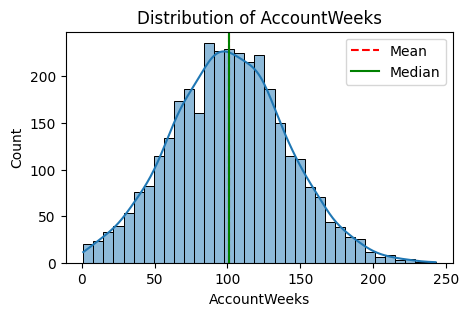

In [66]:
plot_histogram(df, "AccountWeeks")

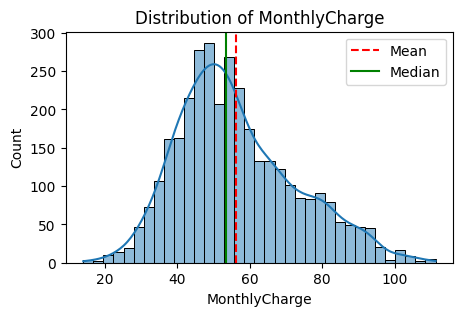

In [67]:
plot_histogram(df, "MonthlyCharge")

In [68]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

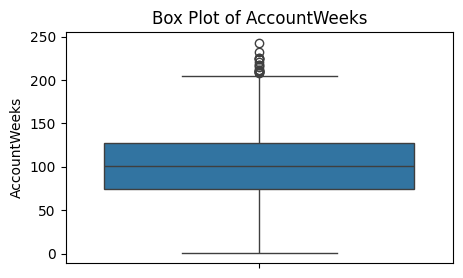

In [69]:
plot_boxplot(df, "AccountWeeks")

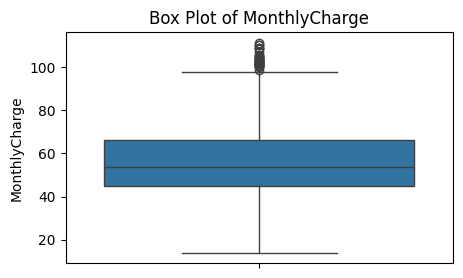

In [70]:
plot_boxplot(df,"MonthlyCharge")

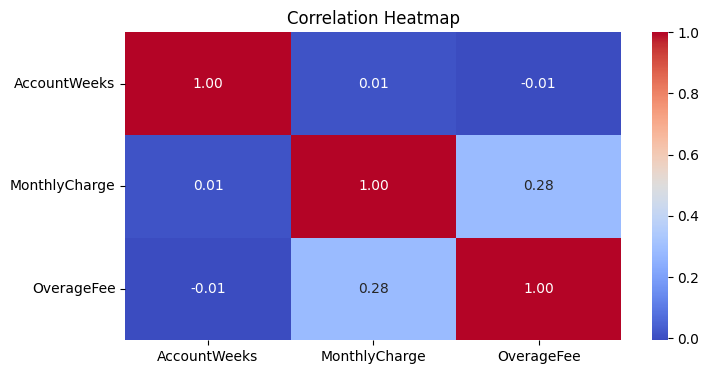

In [71]:
# Selecting relevant numerical columns for correlation analysis
selected_features = ["AccountWeeks", "MonthlyCharge", "OverageFee"]

# Correlation matrix - heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df[selected_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

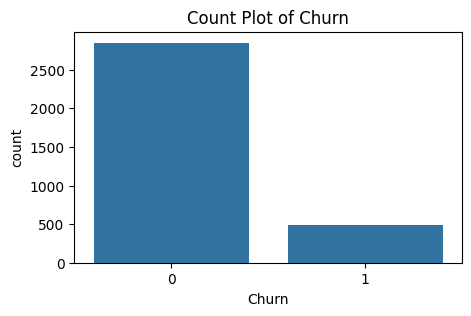

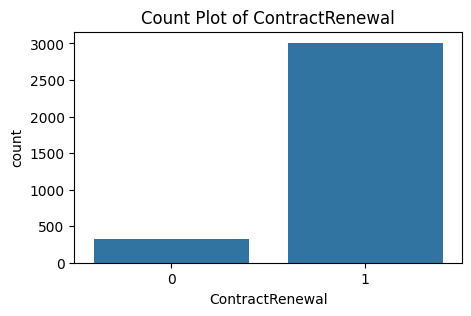

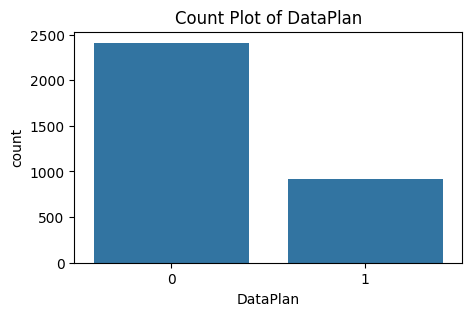

In [72]:
# Identify categorical and binary numerical columns
object_cols = df.select_dtypes(include="object").columns.to_list()
binary_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if df[col].nunique() == 2]

# Combine categorical and binary columns
plot_cols = object_cols + binary_cols

if not plot_cols:
    print("No categorical or binary numerical columns found in the dataset.")
else:
    # Generate count plots for categorical and binary numerical features
    for col in plot_cols:
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.countplot(x=df[col], ax=ax)
        ax.set_title(f"Count Plot of {col}")
        plt.show()

data preprocessing

In [73]:
#Label encoding of target column
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

In [74]:
df.head(3)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2


In [75]:
print(df["Churn"].value_counts())

Churn
0    2850
1     483
Name: count, dtype: int64


In [76]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [77]:
print(object_columns)

Index([], dtype='object')


In [78]:
object_columns = df.select_dtypes(include=['object']).columns.to_list()
print("Categorical columns:", object_columns)

Categorical columns: []


In [79]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [80]:
# splitting the features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [81]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
print(y_train.shape)

(2666,)


In [83]:
print(y_train.value_counts())

Churn
0    2284
1     382
Name: count, dtype: int64


In [84]:

# Check for NaN values
print("Missing values before imputation:\n", X_train.isnull().sum())


imputer = SimpleImputer(strategy="mean")  
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)





Missing values before imputation:
 AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64


In [85]:


# Check missing values after imputation
print("\nMissing values after imputation:\n", X_train_imputed.isnull().sum())





Missing values after imputation:
 AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64


In [86]:
# Define SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the shape after applying SMOTE
print(y_train_smote.shape)

(4568,)


In [87]:
print(y_train_smote.value_counts())

Churn
0    2284
1    2284
Name: count, dtype: int64


Model Training

In [88]:
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [89]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.89
----------------------------------------------------------------------
Training Random Forest with default parameters


Random Forest cross-validation accuracy: 0.94
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.93
----------------------------------------------------------------------


In [90]:
cv_scores

{'Decision Tree': array([0.87827715, 0.88742964, 0.89305816, 0.89305816, 0.88555347]),
 'Random Forest': array([0.94194757, 0.93433396, 0.92870544, 0.93245779, 0.94183865]),
 'XGBoost': array([0.92696629, 0.93058161, 0.93433396, 0.9249531 , 0.9380863 ])}

In [91]:
rfc = RandomForestClassifier(random_state=42)

In [92]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [93]:
print(y_test.value_counts())

Churn
0    566
1    101
Name: count, dtype: int64


In [94]:
# evaluate on test data
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.9265367316341829
Confsuion Matrix:
 [[556  10]
 [ 39  62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       566
           1       0.86      0.61      0.72       101

    accuracy                           0.93       667
   macro avg       0.90      0.80      0.84       667
weighted avg       0.92      0.93      0.92       667



In [95]:
# save the trained model as a pickle file
model_data = {"model": rfc, "features_names": X.columns.tolist()}


with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

Model evaluation


In [96]:
# load teh saved model and the feature names

with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [97]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [98]:
print(feature_names)

['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']


In [99]:
import smtplib as smt

input_data = {
    'AccountWeeks': 50,
    'ContractRenewal': 0,
    'DataPlan': 1,
    'DataUsage': 12.5,
    'CustServCalls': 10,
    'DayMins': 12.5,
    'DayCalls': 80,
    'MonthlyCharge': 45.60,
    'OverageFee': 10.50,
    'RoamMins': 12.0,
}


input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)


# encode categorical featires using teh saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Customer will leave' if prediction[0] == 1 else 'Customer remains'}")
print(f"Prediciton Probability: {pred_prob}")
if prediction == 1:
  Semail= "alexpviju26@gmail.com"
  Remail= input("ENTER CUSTOMER'S MAIL ID : ")
  Sub= "NEW OFFERS"
  msg = """\
    Dear Customer,

    We noticed that you might be considering leaving our service. We value your business and would love to offer you exclusive deals to keep you happy!

    Contact our customer care now to explore the latest offers just for you.

    Best Regards,  
    Your Telecom Provider
    """
  txt =f"Subject : {Sub}\n\n {msg}"
  Server= smt.SMTP("smtp.gmail.com",587)
  Server.starttls()
  Server.login(Semail,"gjqjxgwaicjofhxt")
  Server.sendmail(Semail,Remail,txt)
  print(f"Email has sent to {Remail} ")
  


[1]
Prediction: Customer will leave
Prediciton Probability: [[0.22 0.78]]


SMTPRecipientsRefused: {'': (555, b'5.5.2 Syntax error, cannot decode response. For more information, go to\n5.5.2  https://support.google.com/a/answer/3221692 and review RFC 5321\n5.5.2 specifications. 41be03b00d2f7-af5936fa7a4sm9382734a12.35 - gsmtp')}